In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!ls drive

MyDrive


In [ ]:
%cd /content/drive/MyDrive/'Colab Notebooks'/Person_identification

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Person_identification'
/content


In [ ]:
from glob2 import glob

vhdr_file_list = glob("/content/drive/MyDrive/EEG Dataset/*.vhdr")
#this line is added for only two subjects
for i in range(6):
  vhdr_file_list.pop()
len(vhdr_file_list)

3

In [ ]:
import numpy as np
# extract subject IDs from the file path, create python set to extract unique elements from list, convert to list again 
#unique_patient_ids = list(set([x.split("/")[-1].split(".")[0] for x in vhdr_file_list]))
unique_patient_ids = list(set([x.split(".")[0] for x in vhdr_file_list]))
unique_patient_ids

['/content/drive/MyDrive/EEG Dataset/sub-010002',
 '/content/drive/MyDrive/EEG Dataset/sub-010004',
 '/content/drive/MyDrive/EEG Dataset/sub-010003']

In [ ]:
#check the usability of this step
with open('eeg_subjects.txt', 'w') as file_handler:
    for item in unique_patient_ids:
        file_handler.write("{}\n".format(item))

In [ ]:
!pip install mne

     |████████████████████████████████| 7.4 MB 5.2 MB/s 


In [ ]:
import mne
file_path = "/content/drive/MyDrive/EEG Dataset/sub-010002.vhdr"
raw_data = mne.io.read_raw_brainvision(file_path, verbose=False, preload=False)
raw_data.info["ch_names"]

['Fp1',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'VEOG',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'AFz',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'PO9',
 'O1',
 'Oz',
 'O2',
 'PO10',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'FT7',
 'FC3',
 'FC4',
 'FT8',
 'C5',
 'C1',
 'C2',
 'C6',
 'TP7',
 'CP3',
 'CPz',
 'CP4',
 'TP8',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8']

In [ ]:
#direct unique_patient_ids will be used instead of notepad readings--
# so this step is not executed
#f = open('eeg_subjects.txt', 'r')
#unique_ids = f.readlines()
#print(unique_ids)
label_count = {}
label=1

u_ids = [x.strip() for x in unique_patient_ids]
print(u_ids)
subjects=list(set(u_ids))
print(subjects)
for sub in subjects:
  label_count[sub]=label
  label=0
print(unique_patient_ids) # this is same as subjects processed here

['/content/drive/MyDrive/EEG Dataset/sub-010002', '/content/drive/MyDrive/EEG Dataset/sub-010004', '/content/drive/MyDrive/EEG Dataset/sub-010003']
['/content/drive/MyDrive/EEG Dataset/sub-010003', '/content/drive/MyDrive/EEG Dataset/sub-010002', '/content/drive/MyDrive/EEG Dataset/sub-010004']
['/content/drive/MyDrive/EEG Dataset/sub-010002', '/content/drive/MyDrive/EEG Dataset/sub-010004', '/content/drive/MyDrive/EEG Dataset/sub-010003']


In [ ]:
label_count

{'/content/drive/MyDrive/EEG Dataset/sub-010002': 0,
 '/content/drive/MyDrive/EEG Dataset/sub-010003': 1,
 '/content/drive/MyDrive/EEG Dataset/sub-010004': 0}

In [ ]:
for idx, patient_id in enumerate(unique_patient_ids):

    print(f"\n\n\n {patient_id} : {idx+1}/{len(unique_patient_ids)} \n\n\n")




 /content/drive/MyDrive/EEG Dataset/sub-010002 : 1/3 






 /content/drive/MyDrive/EEG Dataset/sub-010004 : 2/3 






 /content/drive/MyDrive/EEG Dataset/sub-010003 : 3/3 





In [ ]:
for idx, patient_id in enumerate(unique_patient_ids):

    print(f"\n\n\n {patient_id} : {idx+1}/{len(unique_patient_ids)} \n\n\n")

    patient_vhdr_file_list = glob(f"{patient_id}.vhdr")
    print(patient_vhdr_file_list)
    raw_file_path = patient_vhdr_file_list[0]
    print(raw_file_path)
    labels = [x.split(".")[0] for x in patient_vhdr_file_list]
    print (labels)
    label = labels[0]
    print(label)




 /content/drive/MyDrive/EEG Dataset/sub-010002 : 1/3 



['/content/drive/MyDrive/EEG Dataset/sub-010002.vhdr']
/content/drive/MyDrive/EEG Dataset/sub-010002.vhdr
['/content/drive/MyDrive/EEG Dataset/sub-010002']
/content/drive/MyDrive/EEG Dataset/sub-010002



 /content/drive/MyDrive/EEG Dataset/sub-010004 : 2/3 



['/content/drive/MyDrive/EEG Dataset/sub-010004.vhdr']
/content/drive/MyDrive/EEG Dataset/sub-010004.vhdr
['/content/drive/MyDrive/EEG Dataset/sub-010004']
/content/drive/MyDrive/EEG Dataset/sub-010004



 /content/drive/MyDrive/EEG Dataset/sub-010003 : 3/3 



['/content/drive/MyDrive/EEG Dataset/sub-010003.vhdr']
/content/drive/MyDrive/EEG Dataset/sub-010003.vhdr
['/content/drive/MyDrive/EEG Dataset/sub-010003']
/content/drive/MyDrive/EEG Dataset/sub-010003


In [ ]:
for idx, patient_id in enumerate(unique_patient_ids):
    print(f"\n\n\n {patient_id} : {idx+1}/{len(unique_patient_ids)} \n\n\n")
    raw_file_path = patient_id+".vhdr"
    print(raw_file_path)
    #raw_data = mne.io.read_raw_brainvision(raw_file_path, verbose=False, preload=False)




 /content/drive/MyDrive/EEG Dataset/sub-010002 : 1/3 



/content/drive/MyDrive/EEG Dataset/sub-010002.vhdr



 /content/drive/MyDrive/EEG Dataset/sub-010004 : 2/3 



/content/drive/MyDrive/EEG Dataset/sub-010004.vhdr



 /content/drive/MyDrive/EEG Dataset/sub-010003 : 3/3 



/content/drive/MyDrive/EEG Dataset/sub-010003.vhdr


In [ ]:
# pick your desired preprocessing configuration.
SAMPLING_FREQ = 2500  #this is the recorded frequency so it should not be 250
WINDOW_LENGTH_SECONDS = 1.0
WINDOW_LENGTH_SAMPLES = int(WINDOW_LENGTH_SECONDS * SAMPLING_FREQ)


# loop over one subject at a time, and add corresponding metadata to csv
dataset_index_rows = [ ]
#subjects=list(set(u_ids))
label_count = {}
label=1
#for sub in subjects:
for sub in unique_patient_ids:
  label_count[sub]=label
  label=0
for idx, patient_id in enumerate(unique_patient_ids):

    print(f"\n\n\n {patient_id} : {idx+1}/{len(unique_patient_ids)} \n\n\n")
    label=patient_id
    # CAUTION - considering only the first recording here! ??
    raw_file_path = patient_id+".vhdr"
    raw_data = mne.io.read_raw_brainvision(raw_file_path, verbose=False, preload=False)
    
    # generate window metadata = one row of dataset_index
    for start_sample_index in range(0, int(int(raw_data.times[-1]) * SAMPLING_FREQ), WINDOW_LENGTH_SAMPLES):

        end_sample_index = start_sample_index + (WINDOW_LENGTH_SAMPLES - 1)
        
        # ensure 10 seconds are available in window and recording does not end
        if end_sample_index > raw_data.n_times:
            break

        row = {}
        row["patient_id"] = patient_id
        row["raw_file_path"] = raw_file_path
        row["record_length_seconds"] = raw_data.times[-1]
        # this is the desired SFREQ using which sample indices are derived.
        # CAUTION - this is not the original SFREQ at which the data is recorded.
        row["sampling_freq"] = SAMPLING_FREQ
        #row["channel_config"] = raw_file_path.split("/")[5]
        row["start_sample_index"] = start_sample_index
        row["end_sample_index"] = end_sample_index
        row["text_label"] = label
        row["numeric_label"] = label_count[label]
        dataset_index_rows.append(row)
        
# create dataframe from rows, save to disk
import pandas as pd
df = pd.DataFrame(dataset_index_rows, columns=["patient_id", 
                                "raw_file_path",
                                "record_length_seconds", 
                                "sampling_freq",
                                "start_sample_index",
                                "end_sample_index",
                                "text_label",
                                "numeric_label"])
df.to_csv("person_identification_window_index.csv", index=False)




 /content/drive/MyDrive/EEG Dataset/sub-010002 : 1/3 





In [ ]:
label_count

{'/content/drive/MyDrive/EEG Dataset/sub-010002': 1,
 '/content/drive/MyDrive/EEG Dataset/sub-010003': 0,
 '/content/drive/MyDrive/EEG Dataset/sub-010004': 0}

In [ ]:
df


NameError: ignored

In [ ]:
index_df = pd.read_csv("person_identification_window_index.csv")
grouped_df = index_df.groupby("raw_file_path")
for raw_file_path, group_df in grouped_df:
    
    print(f"FILE NAME: {raw_file_path}")
    print(f"WINDOW IDS IN FILE: {group_df.index.tolist()}")
    print(group_df['numeric_label'])

FILE NAME: /content/drive/MyDrive/EEG Dataset/sub-010002.vhdr
WINDOW IDS IN FILE: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 20

In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# X_scale=scaler.fit_transform(X)
# print(X_scale)

In [ ]:
index_df = pd.read_csv("person_identification_window_index.csv")
grouped_df = index_df.groupby("raw_file_path")
#SAMPLING_FREQ = 250.0
data=[]
# open up one raw_file at a time.
for raw_file_path, group_df in grouped_df:
    
    print(f"FILE NAME: {raw_file_path}")
    print(f"WINDOW IDS IN FILE: {group_df.index.tolist()}")
    #channel_config = str(group_df["channel_config"].unique()[0])
    #print(channel_config)
    
    # NOTE - PREPROCESSING = open the file, select channels, apply montage, downsample to 250, highpass, notch filter -- not required
    raw_data = mne.io.read_raw_brainvision(raw_file_path, verbose=True, preload=True)
    #raw_data, sfreq = downsample(raw_data, SAMPLING_FREQ)
    #raw_data = highpass(raw_data, 1.0)
    #raw_data = remove_line_noise(raw_data)
    
    # data is ready for feature extraction, loop over windows, extract features -- not required.. only windowing of signal is necessary
    for window_idx in group_df.index.tolist():
        
        # get raw data for the window
        start_sample = group_df.loc[window_idx]['start_sample_index']
        stop_sample = group_df.loc[window_idx]['end_sample_index']
        window_data = raw_data.get_data(start=start_sample, stop=stop_sample)
        #apply scaling
        window_data=scaler.fit_transform(window_data)
        data.append(window_data)

X = np.array(data)
print(X.shape)

FILE NAME: /content/drive/MyDrive/EEG Dataset/sub-010002.vhdr
WINDOW IDS IN FILE: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 20

In [ ]:
X.shape

(3050, 62, 2499)

In [ ]:
window_data.shape

(62, 2499)

In [ ]:
y_label=index_df['numeric_label']
print(y_label)

0       1
1       1
2       1
3       1
4       1
       ..
3045    0
3046    0
3047    0
3048    0
3049    0
Name: numeric_label, Length: 3050, dtype: int64


In [ ]:
#without saving start
# Y=y_label
#end

#save the X and Y in disk

np.save("/content/drive/MyDrive/EEG Dataset/X_raw1.npy", X)
print(" X data saved")

#now use these files for fetching training data and testing data

 X data saved


In [ ]:
np.save("/content/drive/MyDrive/EEG Dataset/Y_label1.npy", y_label)
print(" Y data saved")

 Y data saved


In [ ]:
# X=np.load('/content/drive/MyDrive/EEG Dataset/X_ra/w1.npy')
# Y=np.load('/content/drive/MyDrive/EEG Dataset/Y_label1.npy')

In [ ]:
X.shape,Y.shape

((2028, 62, 2499), (2028,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

NameError: ignored

In [ ]:
#print the number of classes
classes = np.unique(y_train)
print(len(classes))

2


In [ ]:
y_train,y_test

(1977    0
 380     1
 363     1
 526     1
 1234    0
        ..
 517     1
 910     1
 1940    0
 208     1
 1139    0
 Name: numeric_label, Length: 1419, dtype: int64, 1302    0
 1351    0
 751     1
 661     1
 1090    0
        ..
 690     1
 594     1
 204     1
 430     1
 286     1
 Name: numeric_label, Length: 609, dtype: int64)

In [ ]:
import matplotlib.pyplot as plt
for i in range(2):
  #plt.plot(x_train[i]) 
  print(x_train[i].shape)

(62, 2499)
(62, 2499)


 ...]

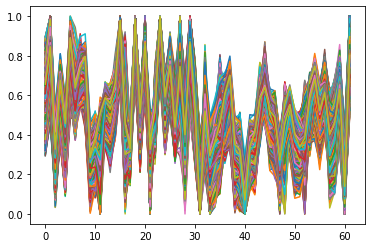

In [ ]:
plt.plot(x_train[0])

In [ ]:
try_x=x_train[0].T

In [ ]:
try_x.shape

(2499, 62)

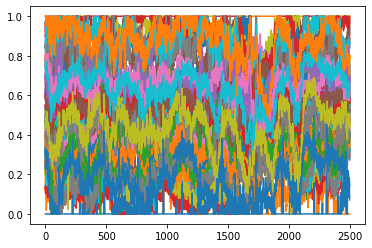

In [ ]:
plt.plot(try_x)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import datasets, layers, models

In [ ]:
def createCNNModel():
  window_col = 2499
  window_row = 62
  model = Sequential()
  model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(window_row, window_col, 1)))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(64, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(128, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Conv2D(256, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Flatten())
  model.add(Dropout(0.5))
  #model.add(Dense(1024, activation = 'relu'))
  model.add(Dense(512, activation = 'relu'))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(1, activation='softmax'))
  print(model.summary())
  return model

In [ ]:
def validationCNN(model):
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','mse','sparse_categorical_crossentropy'])
  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


In [ ]:
model = createCNNModel()
validationCNN(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 2497, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 1248, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 1246, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 623, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 621, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 310, 128)      0